# [資管導]回覆資料分析

一些note：我有總人數、許多nominal資料，都可以拿來計數；反過來說沒有太多numerical資料，不能做之前想到那些要用標準差之類的假設檢定(這種用需要的資料型態來想作法的思考順序真的很糟糕)，此外，這些問題根本很難配合在一起組合驗證！敘述的目標不但特定，組合起來變得很瑣碎，本身問這些組合也不是很有意義...

現在是2025/9/19，現在其實沒必要再做這份統計了

## 第一部分

### 資料前處理

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import matplotlib.font_manager as fm

# # 列出系統中所有可用字體
# all_fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print("系統中的所有字體:")
# for font in all_fonts:
#     print(font)
    
# # 嘗試篩選出可能支持中文的字體
# print("\n可能支持中文的字體:")
# for font in all_fonts:
#     if "SimHei" in font or "KaiTi" in font or "FangSong" in font or "PingFang" in font or "Noto" in font or "Source Han" in font:
#         print(font)

In [73]:
# 讀取資料集
df_reply = pd.read_excel("[112-2IMI] (reply).xlsx")
print(df_reply.columns)

Index(['Unnamed: 0', '電子郵件地址', '您的年齡 (請填正整數)', '是否是台大教職員/學生？',
       'Q1. 日常生活中，你比較喜歡選擇喝茶還是喝咖啡', 'Q2. 你在日常生活中想要喝茶時，通常選擇會去哪裡找茶飲呢？',
       'Q3. 你認為茶類飲料是否適合搭配其他口味？(如檸檬紅茶、奶茶、多多綠茶等，如果是覺得某些適合某些不適合的請選是)',
       'Q4. 你比較喜歡在哪種情境下飲茶？(要有試過的才可以選)', 'Q5. 你認為最適合搭配茶品享用的配料是？',
       'Q6. 在想要喝什麼茶的時候，你認為茶的產地對你的選擇而言是否重要？', 'W1. 你寧可在對你來說很重要的運動賽事前一天晚上',
       'W2. 如果你獲得一批高級茶葉，你寧可', 'W3. 你寧可在路上隨機找一個陌生人，對他說',
       'W4. 你寧可在平均氣溫飆破32度的夏天室外每天喝掉', 'W5. 你寧可在加入學校社團前，被告知必須來一杯',
       'W6. 如果可以回到過去，你寧可親眼見證', 'W7. If you have a chance, would you rather',
       '請投給你覺得看起來最有趣的梗圖', '幫我們想一些茶梗(有圖片更好，最後可能會被我們選成發文的梗圖)', '如果有圖源，請附上圖源',
       '任何你想說的話或建議'],
      dtype='object')


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib import font_manager as fm

# # 設定字體
# font_path = "C:/Windows/Fonts/NotoSans-Italic.ttf"  # 替換為字體路徑
# zh_font = fm.FontProperties(fname=font_path)
# rcParams['font.family'] = zh_font.get_name()
# rcParams['axes.unicode_minus'] = False
# sns.set(font=zh_font.get_name())

# 1. 讀取資料
# file_path = "survey_data.csv"  # 替換為你的檔案路徑
# data = pd.read_csv(file_path)
data = pd.read_excel("[112-2IMI] (reply).xlsx")

data.rename(columns={"您的年齡 (請填正整數)": "age", 
                     "Q1. 日常生活中，你比較喜歡選擇喝茶還是喝咖啡": "q1", 
                     "Q2. 你在日常生活中想要喝茶時，通常選擇會去哪裡找茶飲呢？": "q2",
                     "Q3. 你認為茶類飲料是否適合搭配其他口味？(如檸檬紅茶、奶茶、多多綠茶等，如果是覺得某些適合某些不適合的請選是)": "q3",
                     'Q4. 你比較喜歡在哪種情境下飲茶？(要有試過的才可以選)': "q4", 
                     'Q5. 你認為最適合搭配茶品享用的配料是？': "q5",
                     'Q6. 在想要喝什麼茶的時候，你認為茶的產地對你的選擇而言是否重要？': "q6", 
                     
                     'W1. 你寧可在對你來說很重要的運動賽事前一天晚上': "w1",
                     'W2. 如果你獲得一批高級茶葉，你寧可': "w2", 
                     'W3. 你寧可在路上隨機找一個陌生人，對他說': "w3",
                     'W4. 你寧可在平均氣溫飆破32度的夏天室外每天喝掉': "w4", 
                     'W5. 你寧可在加入學校社團前，被告知必須來一杯': "w5",
                     'W6. 如果可以回到過去，你寧可親眼見證': "w6", 
                     'W7. If you have a chance, would you rather': "w7",
                     '請投給你覺得看起來最有趣的梗圖': "m1", 
                     '幫我們想一些茶梗(有圖片更好，最後可能會被我們選成發文的梗圖)': "m2", 
                     '如果有圖源，請附上圖源': "m-img",
                     '任何你想說的話或建議': "advice",
                     'Unnamed: 0': "time", 
                     '電子郵件地址': "email",
                     '是否是台大教職員/學生？': "ntu"}, inplace="true")

print(data.columns)

Index(['time', 'email', 'age', 'ntu', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'w1',
       'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'm1', 'm2', 'm-img', 'advice'],
      dtype='object')


In [72]:
# # "年齡" 列可能有空值或非數值，進行處理
# data['age'] = pd.to_numeric(data['age'], errors='coerce')
# data.dropna(subset=['age'], inplace=True)

### 敘述統計

In [104]:
data["ntu"].value_counts()

ntu
是    29
否    16
Name: count, dtype: int64

ps. 可能會做校內特別的檢測，收集一下

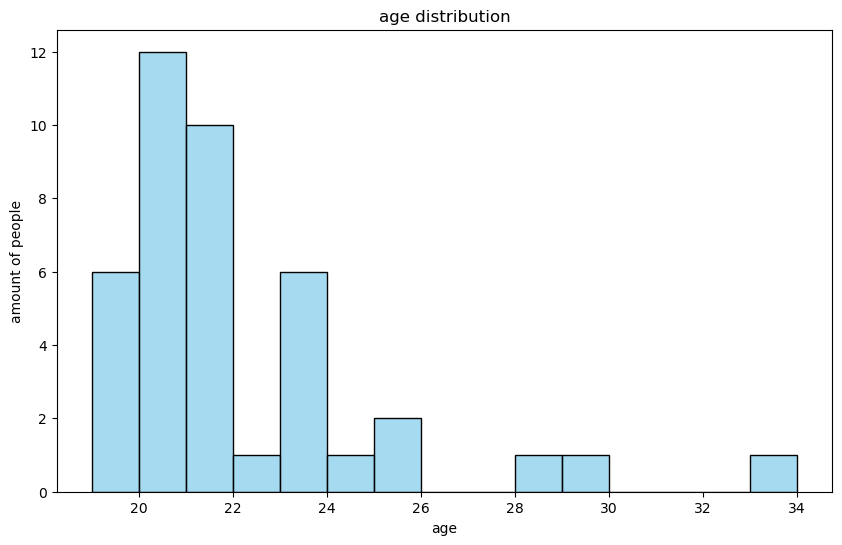

In [102]:
# 年齡分佈 (age distribution)
plt.figure(figsize=(10, 6))

# define bins to cover each age individually
min_age = data['age'].min()
max_age = data['age'].max()
bins = np.arange(min_age+1, max_age + 2)  # +2 because np.arange is exclusive at the end

sns.histplot(data['age'], bins=bins, color='skyblue')

plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('amount of people')
plt.show()

解釋：作答者果然還是較多大學生，只能說這會是一篇比較貼近對大學生飲茶習慣的調查

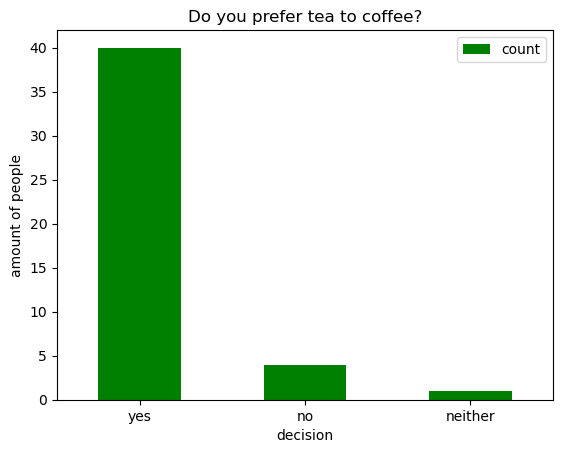

In [76]:
# (2) 茶和咖啡選擇比例
drink_preference = data['q1'].value_counts().reset_index()

ax = drink_preference.plot(kind="bar", color=['green', 'brown'])
ax.set_xticklabels(["yes", "no", "neither"])  # put your own labels
plt.title('Do you prefer tea to coffee?')
plt.xlabel('decision')
plt.ylabel('amount of people')
plt.xticks(rotation=0)
plt.show()

解釋：沒想到這麼多人喜歡喝茶勝過咖啡

In [40]:
# # (3) 年齡與選擇茶/咖啡的關係
# plt.figure(figsize=(10, 6))
# s = sns.boxplot(x='q1', y='age', data=data)
# s.set_xticklabels(["yes", "no", "neither"])
# plt.title('Do you prefer tea to coffee? regarding to age')
# plt.xlabel('drink decision')
# plt.ylabel('age')
# plt.show()

q2
手搖飲料店                  19
鋁箔包裝或瓶裝茶(超商或飲料機販售的)    15
超商或超市茶包                 5
專櫃買的罐裝茶葉或茶包             2
茶店買的茶包                  1
隨餐的紅茶、冷泡茶               1
用茶葉自己冷泡                 1
手搖飲 + 超商 + 自己泡罐裝茶       1
Name: count, dtype: int64


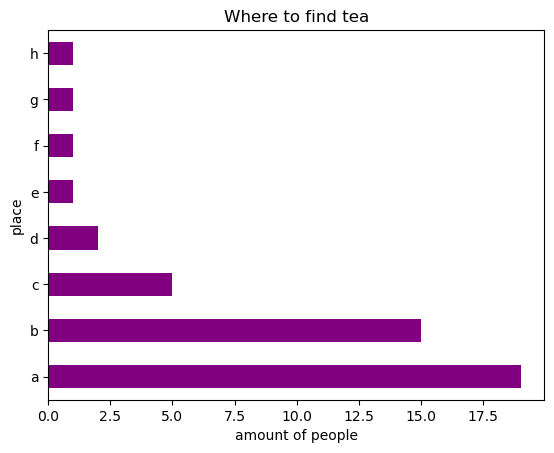

In [106]:
location_preference = data['q2'].value_counts()
print(location_preference)

ax = location_preference.plot(kind='barh', color='purple')
ax.set_yticklabels(["a", "b", "c", "d", "e", "f", "g", "h"])
plt.title('Where to find tea')
plt.xlabel('amount of people')
plt.ylabel('place')
plt.show()

解釋：手搖飲料店勝、超商第二，但重點，用茶葉自己冷泡很少(非常正常)

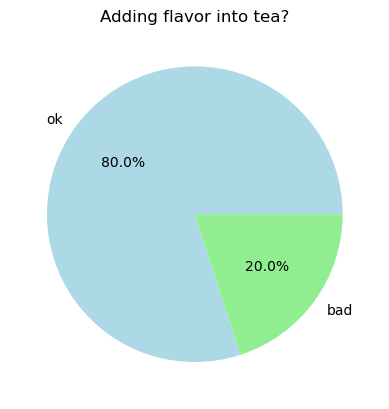

In [78]:
# (5) 是否認為茶類飲料適合搭配其他口味 (Q3)
taste_preference = data['q3'].value_counts()
ax = taste_preference.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'pink'], labels=["ok", "bad", "fine"])
plt.title('Adding flavor into tea?')
plt.ylabel('')
plt.show()

解釋：也確實比較少人堅持喝純茶葉

q4
不特別指定的地點(如路上、教室，重點是隨意)    31
自己家裡或房間裡                   9
甜點店或咖啡店                    2
茶藝館                        2
都有，但你設置成單選                 1
Name: count, dtype: int64


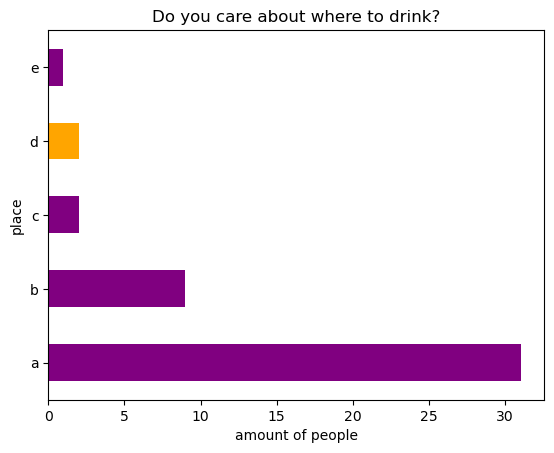

In [105]:
location_preference = data['q4'].value_counts()
print(location_preference)

colors = ['purple'] * len(location_preference)
colors[3] = 'orange'  # change the 3rd bar to orange

ax = location_preference.plot(kind='barh', color=colors)
ax.set_yticklabels(["a", "b", "c", "d", "e"])
plt.title('Do you care about where to drink?')
plt.xlabel('amount of people')
plt.ylabel('place')
plt.show()

* 上圖橘色表茶藝館

解釋：喝茶的地點也大多隨意，沒有什麼人真的非常在意「茶藝」之類品茶的情境，更不用說茶藝館了(還是有一些人會去)

ps. 設置成單選非常抱歉，也是在做完這份問卷後，我越來越常參考其他人做的，不敢再自己亂設計了

q5
是，加入飲品中的加工配料如珍珠、椰果等      14
是，另外搭配餅乾或甜點等點心           13
是，加入飲品中的新鮮配料如蘆薈、新鮮水果等     6
否，茶不太適合配其他東西              6
是，另外搭配小菜等鹹食或正餐            3
可以配也可以不配                  1
珍珠、餅乾或甜點等點心               1
多多                        1
Name: count, dtype: int64


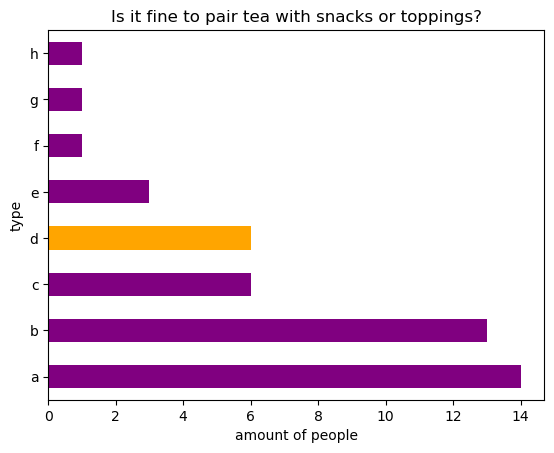

In [107]:
addin_preference = data['q5'].value_counts()
print(addin_preference)

colors = ['purple'] * len(addin_preference)
colors[3] = 'orange'  # change the 3rd bar to orange

ax = addin_preference.plot(kind='barh', color=colors)
ax.set_yticklabels(["a", "b", "c", "d", "e", "f", "g", "h"])
plt.title('Is it fine to pair tea with snacks or toppings?')
plt.xlabel('amount of people')
plt.ylabel('type')
plt.show()

* 上圖橘色表不願加料

解釋：在意加料與否的人也是少數

ps. 我知道長條圖不能顯示數量比較...但為了標示顏色輕鬆就偷懶了

q6
0    11
1    13
2     9
3     6
4     3
5     3
Name: count, dtype: int64


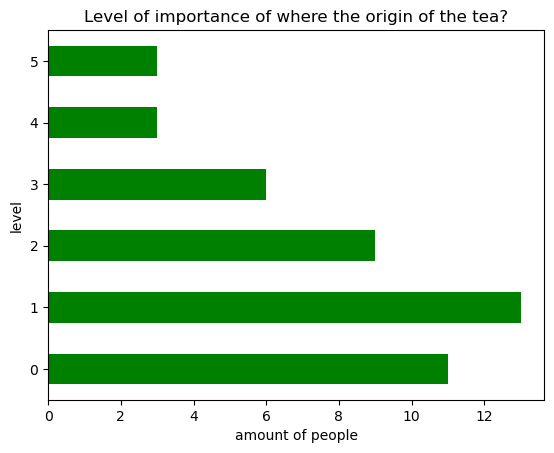

In [108]:
origin_importance = data['q6'].value_counts(sort=False).sort_index()
print(origin_importance)

ax = origin_importance.plot(kind='barh', color="green")
plt.title('Level of importance of where the origin of the tea?')
plt.xlabel('amount of people')
plt.ylabel('level')
plt.show()

解釋：會非常在意產地的人也很少

### 假設檢定

大問題：我忘記sampling前是不是要做些準備，尤其原本是想要用少數的取樣代表群體，但我當時忘記是否需要一些額外的採樣手段而不能直接隨意發問卷

(當然也許只要人數夠多就好了？就不用無母數統計

接下來的假設檢定，是一些我刻意檢測的項目，雖然這樣做很糟，目的是想顯示一些更大方向的發現讓大家認同一些情況(反正就算刻意，如果檢定過了敘述就算對的...大概是這樣相當沒有實驗精神(缺乏道德和合理性)的想法)

(T1)偏好純粹不加料及口味的茶飲的人少於15% (這是不是看敘述資料就夠了)

ps. 根據chatgpt還有我依稀的記憶，因為p0設定的值(0.15)*n(42)>5(其實我只記得5和n的部分)，就可以假設這份二項分布資料近似常態(說到這裡，我還是一直沒有釐清這邊指的資料到底是樣本近似常態而已還是母體近似常態，雖然這好像是在二項分佈外也會出現的問題而且我猜答案是都是，但當然需要一些定理佐證...)

In [130]:
from scipy.stats import norm

n = len(data)
no_topping_and_flavor = (data['q3'] == '否') & (data['q5'] == '否，茶不太適合配其他東西')

x = no_topping_and_flavor.sum()
p_hat = x / n
p0 = 0.15

z = (p_hat - p0) / ((p0 * (1-p0) / n) ** 0.5)

p_value = norm.cdf(z)

print(f"樣本比例: {p_hat:.3f}")
print(f"z 值: {z:.3f}")
print(f"p 值: {p_value:.3f}")

if p_value < 0.05:
    print("拒絕 H0：比例顯著小於 15%")
else:
    print("無法拒絕 H0：沒有顯著證據表明比例小於 15%")

樣本比例: 0.022
z 值: -2.401
p 值: 0.008
拒絕 H0：比例顯著小於 15%


(T2) 會去茶藝館的人小於15% (這是不是也是)

In [128]:
tea_house = (data['q4'] == '茶藝館')

x = tea_house.sum()
p_hat = x / n
p0 = 0.15

z = (p_hat - p0) / ((p0 * (1-p0) / n) ** 0.5)

p_value = norm.cdf(z)

print(f"樣本比例: {p_hat:.3f}")
print(f"z 值: {z:.3f}")
print(f"p 值: {p_value:.3f}")

if p_value < 0.05:
    print("拒絕 H0：比例顯著小於 15%")
else:
    print("無法拒絕 H0：沒有顯著證據表明比例小於 15%")

樣本比例: 0.044
z 值: -1.983
p 值: 0.024
拒絕 H0：比例顯著小於 15%


(T3) 在意茶產地的平均值小於2.5 (這是不是也是)

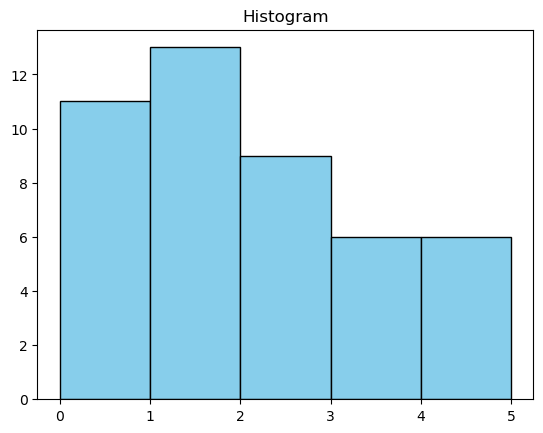

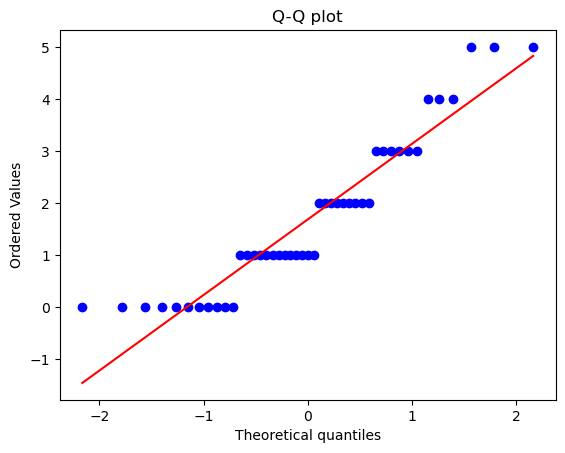

In [136]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# 直方圖
plt.hist(data["q6"], bins=5, color='skyblue', edgecolor='black')
plt.title("Histogram")
plt.show()

# Q-Q plot
stats.probplot(data["q6"], dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.show()
# 如果 Q-Q plot 的點大致落在 45 度線上，表示符合常態分佈。

In [163]:
# by chatgpt，然後我不記得有學過這個方法
from scipy.stats import norm, chi2, probplot

categories = np.sort(np.unique(data["q6"]))
expected_freq = []
mean = np.mean(data["q6"])
std = np.std(data["q6"], ddof=1)

for c in categories:
    prob = norm.cdf(c + 0.5, mean, std) - norm.cdf(c - 0.5, mean, std)
    expected_freq.append(prob * n)

observed_freq = [np.sum(data["q6"] == c) for c in categories]
chi2_stat = np.sum((np.array(observed_freq) - np.array(expected_freq))**2 / np.array(expected_freq))
df = len(categories) - 1 - 2  # 減掉平均數與標準差估計
p_value = 1 - chi2.cdf(chi2_stat, df)

print(f"Chi-square stat: {chi2_stat:.3f}, p-value: {p_value:.3f}")
if p_value > 0.05:
    print("近似符合常態")
else:
    print("不符合常態")

Chi-square stat: 8.470, p-value: 0.037
不符合常態


In [164]:
# by chatgpt，不符合常態的替代方案，我也不記得了
from scipy.stats import wilcoxon

stat, p = wilcoxon(data["q6"] - 2.5, alternative='less')
print(f"Wilcoxon 統計量: {stat:.3f}, p 值: {p:.3f}")
if p < 0.05:
    print("拒絕 H0：中位數顯著小於 2.5")
else:
    print("無法拒絕 H0")

Wilcoxon 統計量: 234.000, p 值: 0.001
拒絕 H0：中位數顯著小於 2.5


In [148]:
# from scipy import stats

# x_bar = np.mean(data["q6"])
# s = np.std(data["q6"], ddof=1)
# mu0 = 2.5

# # t 檢定統計量
# t_stat = (x_bar - mu0) / (s / np.sqrt(n))

# # 自由度
# df = n - 1

# # p 值（左尾檢定）
# p_value = stats.t.cdf(t_stat, df)

# print(f"樣本平均值: {x_bar:.3f}")
# print(f"t 值: {t_stat:.3f}")
# print(f"p 值: {p_value:.3f}")

# if p_value < 0.05:
#     print("拒絕 H0：平均值顯著小於 2.5")
# else:
#     print("無法拒絕 H0：沒有顯著證據表明平均值小於 2.5")

ps. 如果不做個這個樣本能否代表某個群體的檢定，好像根本看敘述資料就夠了，這大概是我一直不做的最主要原因(是藉口...實際做出來也只弄了一點點，而且沒解釋什麼)，沒想到自己設計整份問卷和實驗這麼糟X)

解釋：總之，我只是想呈現大家其實都不是那麼在意茶的產地、品味時機或口味加料與否等，這也是我原先設計這份問卷預想的結果(雖然不該這樣)，不過我覺得這樣才是正常，沒有什麼才是比較高尚的品茶方式，只是會在意這些的人很少，如果大家願意去試試或許也許會挺不錯的(到底在說什麼，跟統計內容幾乎無關)

ps. 我不喜歡這堂課在這個主題上的方法

ps. 我想上述的統計方法大概還是有不少錯誤，而且我也是滿盲目地在做，就交給大家公審了X)

ps. 還有最後根本沒算台大學生與否或年齡層相關的分析，不過基本的分析樣本數就快不夠了，加上整個統計方法的設計本來就有問題，我就不再多折磨自己了

## 第二部分

既然都問了，就整理一下

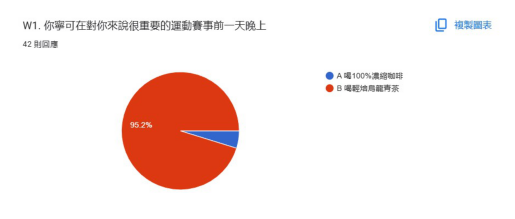

In [152]:
import matplotlib.image as mpimg
img = mpimg.imread("w1.jpg")

plt.imshow(img)
plt.axis('off')  
plt.show()

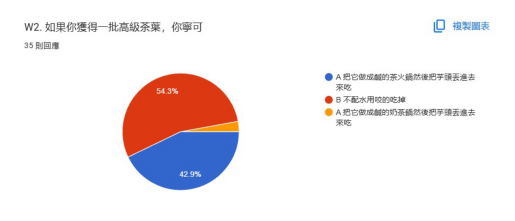

In [154]:
img = mpimg.imread("w2.jpg")

plt.imshow(img)
plt.axis('off')  
plt.show()

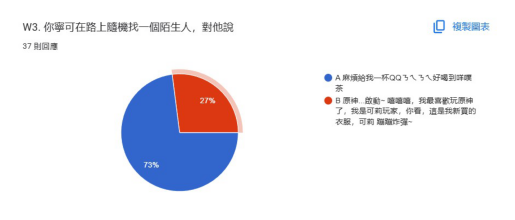

In [155]:
img = mpimg.imread("w3.jpg")

plt.imshow(img)
plt.axis('off')  
plt.show()

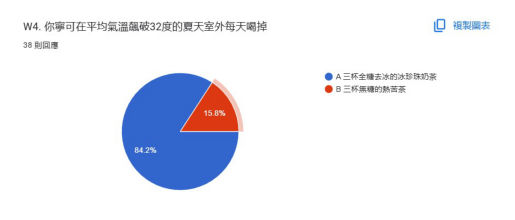

In [156]:
img = mpimg.imread("w4.jpg")

plt.imshow(img)
plt.axis('off')  
plt.show()

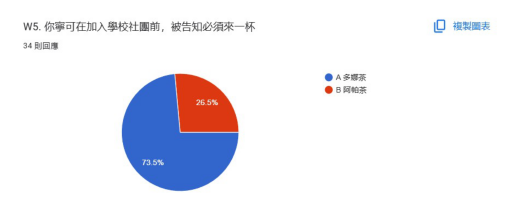

In [157]:
img = mpimg.imread("w5.jpg")

plt.imshow(img)
plt.axis('off')  
plt.show()

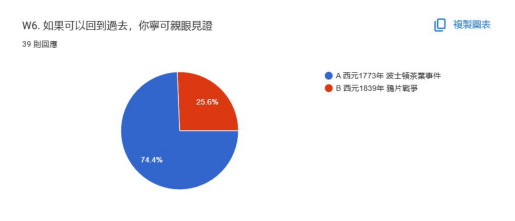

In [158]:
img = mpimg.imread("w6.jpg")

plt.imshow(img)
plt.axis('off')  
plt.show()

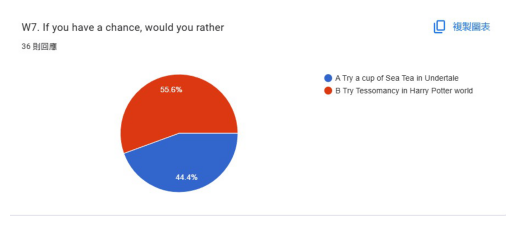

In [159]:
img = mpimg.imread("w7.jpg")

plt.imshow(img)
plt.axis('off')  
plt.show()

對，我自己覺得發出這份問卷還有問的內容都很荒謬，然後真的不想沒人回答，就只想著要好玩一點...

但回頭看只覺得蠢到不行

## 第三部分

獲勝的梗是茶裡布朗，圖見網址：https://sora.chatgpt.com/g/gen_01k5h7pvcefg1ttbcqwvk32pjb

嗯，sora生成的，然後我不知道有沒有史努比的版權，所以還是不要亂放好了